In [1]:
from model_utils import save_result, create_model, load_train_test

Using TensorFlow backend.


In [2]:
DATA_PATH = 'data/'
INPUT_SHAPE = (32, 32, 3)
N_CLASS = 2
EPOCHS = 50
BATCH_SIZE = 10
OPTIMIZER = "adam"
LOSS = "categorical_crossentropy"

In [3]:
x_train, y_train, x_test, y_test = load_train_test(DATA_PATH)

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(178, 32, 32, 3) (178, 2)
(32, 32, 32, 3) (32, 2)


In [6]:
prepare_inst = create_model(INPUT_SHAPE, N_CLASS, LOSS, OPTIMIZER, True)
nn_model =  prepare_inst.prepare_nn()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 256)       295168    
_________________________________________________________________
conv2d_5 (Conv2D)    

In [7]:
nn = nn_model.fit(x_train,y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, verbose=1, 
                                        validation_data=(x_test, y_test), shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 178 samples, validate on 32 samples
Epoch 1/50
178/178 [==============================] - 5s 27ms/step - loss: 0.6921 - acc: 0.5449 - mean_squared_error: 0.2495 - val_loss: 0.6905 - val_acc: 0.4688 - val_mean_squared_error: 0.2487
Epoch 2/50
178/178 [==============================] - 1s 3ms/step - loss: 0.6926 - acc: 0.5169 - mean_squared_error: 0.2498 - val_loss: 0.6883 - val_acc: 0.5000 - val_mean_squared_error: 0.2476
Epoch 3/50
178/178 [==============================] - 1s 3ms/step - loss: 0.6872 - acc: 0.5562 - mean_squared_error: 0.2470 - val_loss: 0.6854 - val_acc: 0.7813 - val_mean_squared_error: 0.2461
Epoch 4/50
178/178 [==============================] - 1s 3ms/step - loss: 0.6849 - acc: 0.5730 - mean_squared_error: 0.2459 - val_loss: 0.6830 - val_acc: 0.5625 - val_mean_squared_error: 0.2449
Epoch 5/50
178/178 [==============================] - 1s 4ms/step - loss: 0.6804 - acc: 0.6180 - mean_squared_error: 0.2436 - val_

178/178 [==============================] - 1s 3ms/step - loss: 0.4010 - acc: 0.8427 - mean_squared_error: 0.1259 - val_loss: 0.4632 - val_acc: 0.8125 - val_mean_squared_error: 0.1500
Epoch 42/50
178/178 [==============================] - 1s 3ms/step - loss: 0.4148 - acc: 0.8483 - mean_squared_error: 0.1306 - val_loss: 0.4817 - val_acc: 0.8125 - val_mean_squared_error: 0.1542
Epoch 43/50
178/178 [==============================] - 1s 3ms/step - loss: 0.4064 - acc: 0.8258 - mean_squared_error: 0.1260 - val_loss: 0.4323 - val_acc: 0.7812 - val_mean_squared_error: 0.1361
Epoch 44/50
178/178 [==============================] - 1s 3ms/step - loss: 0.3999 - acc: 0.8539 - mean_squared_error: 0.1223 - val_loss: 0.4136 - val_acc: 0.8750 - val_mean_squared_error: 0.1297
Epoch 45/50
178/178 [==============================] - 1s 3ms/step - loss: 0.3803 - acc: 0.8483 - mean_squared_error: 0.1168 - val_loss: 0.5640 - val_acc: 0.7500 - val_mean_squared_error: 0.1830
Epoch 46/50
178/178 [================

Model Historic Saved.
Model H5 Saved.
Preview Metrics-Results Saved.


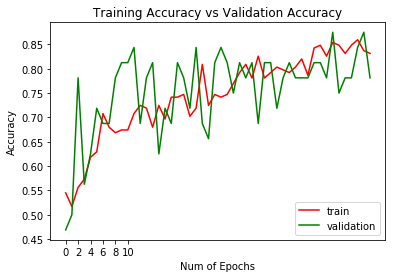

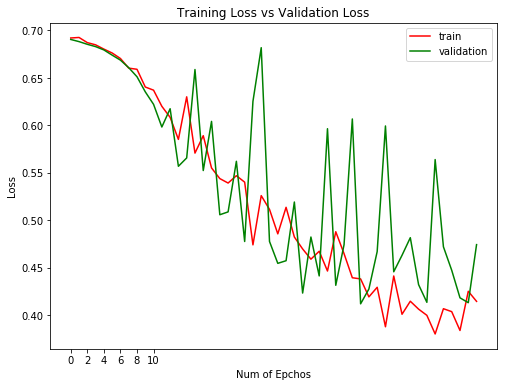

In [8]:
save_result(nn, nn_model, DATA_PATH)

In [28]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report 

In [29]:
nn_pred = nn_model.predict(x_test, batch_size=10, verbose=1)
nn_predicted = np.argmax(nn_pred, axis=1)

32/32 [==============================] - 0s 1ms/step


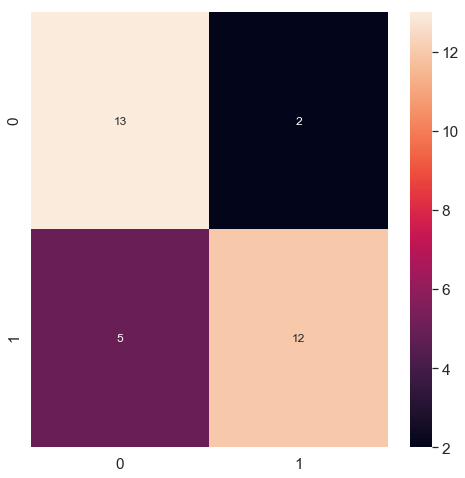

In [30]:
#Creamos la matriz de confusión
nn_cm = confusion_matrix(np.argmax(y_test, axis=1), nn_predicted)

# Visualizamos la matriz de confusión
nn_df_cm = pd.DataFrame(nn_cm, range(2), range(2))  
plt.figure(figsize = (8,8))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(nn_df_cm, annot=True, annot_kws={"size": 12}) # font size  

In [31]:
nn_report = classification_report(np.argmax(y_test, axis=1), nn_predicted)  
print(nn_report)

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.86      0.71      0.77        17

   micro avg       0.78      0.78      0.78        32
   macro avg       0.79      0.79      0.78        32
weighted avg       0.79      0.78      0.78        32

